In [55]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams

In [56]:
df=pd.read_excel('Time series for STat Take Home test.xlsx')
values=['test_-W11','test_-W12','test_-W13','test_-W14','test_-W15','test_-W16','test_-W17','test_-W18','test_-W19','test_-W20']
cond= ~df['week'].isin(values)
df=df[cond]
df.tail()

,week,Rev from a Sport Store retail
266,20-W06,1.454491e+06
267,20-W07,1.851955e+06
268,20-W08,2.236988e+06
269,20-W09,1.462602e+06
270,20-W10,1.782698e+06


In [57]:
df

,week,Rev from a Sport Store retail
0,15-W01,9.956822e+05
1,15-W02,1.175470e+06
2,15-W03,1.406700e+06
3,15-W04,1.042557e+06
4,15-W05,1.268013e+06
...,...,...
266,20-W06,1.454491e+06
267,20-W07,1.851955e+06
268,20-W08,2.236988e+06
269,20-W09,1.462602e+06


In [58]:
dates=pd.date_range(start='2015-01-01',end='2020-03-08')
df_sun=pd.DataFrame(dates,columns=['date'])
df_sun=df_sun[df_sun['date'].dt.day_name()=='Sunday'].reset_index(drop=True)

In [59]:
df['date']=df_sun['date']

In [60]:
df.tail()

,week,Rev from a Sport Store retail,date
266,20-W06,1.454491e+06,2020-02-09
267,20-W07,1.851955e+06,2020-02-16
268,20-W08,2.236988e+06,2020-02-23
269,20-W09,1.462602e+06,2020-03-01
270,20-W10,1.782698e+06,2020-03-08


In [61]:
y_train=df.drop(columns='week').set_index('date',drop=True)

In [79]:
y_train.diff()['2015-01-11':]

,Rev from a Sport Store retail
date,
2015-01-11,179787.539845
2015-01-18,231230.345326
2015-01-25,-364143.571628
2015-02-01,225456.573772
2015-02-08,-112626.741542
...,...
2020-02-09,-163785.558300
2020-02-16,397464.430981
2020-02-23,385033.131699


In [63]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(train)
adfuller(y_train['Rev from a Sport Store retail'].values)[1]


0.0003374696635782227

C:\Users\nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


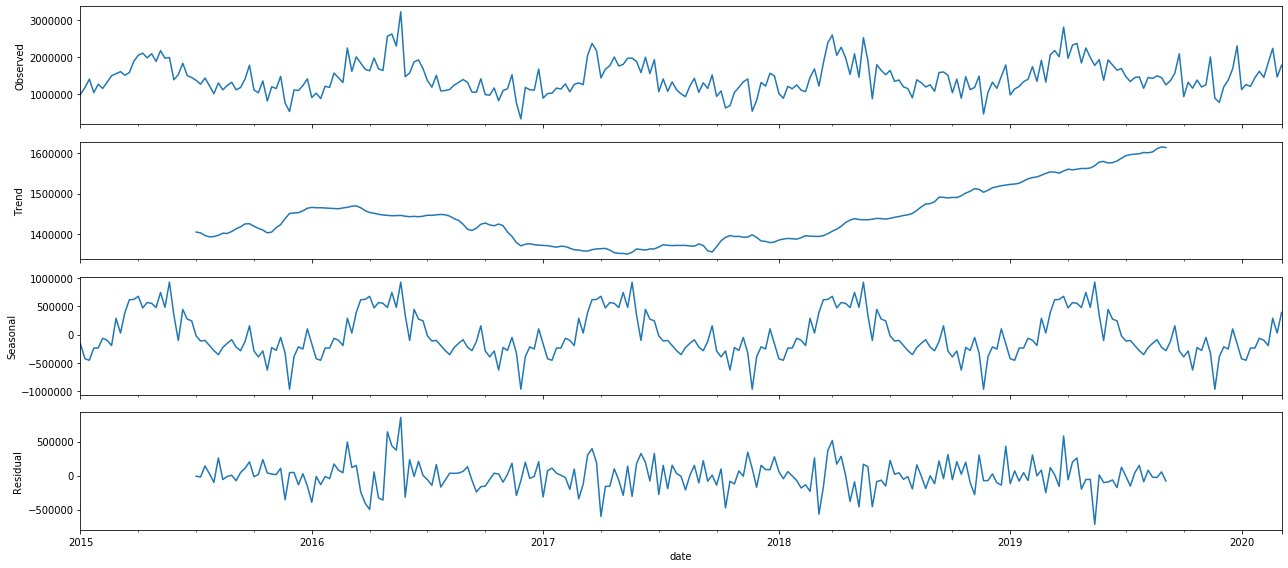

In [64]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_train, model='additive',)
decomposition.plot().show()

In [66]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [68]:
previous=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(y_train,order=param,trend='ct',seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
            if previous==0:
                previous= results.aic
                
            if results.aic<previous:
                best_param='ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic)
                previous= results.aic
print(best_param)

C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:7781.815716125106
ARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC:6215.407207070875


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:6167.609452956713


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:4657.842134810319


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:6285.015415541069


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 52) - AIC:6215.377668981155


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:4700.110152360509


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 52) - AIC:4658.60994449463
ARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:7696.147176974797

C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 52) - AIC:6177.872951222373


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:6144.307695590405


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC:4632.032308978091


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:6276.110271046953


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 52) - AIC:6178.400105161272


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:4703.886765520194


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 52) - AIC:4633.125454868872
ARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC:7707.662735706504


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC:6221.228604156818


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 52) - AIC:6278.320661951035


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 52) - AIC:4729.519914428111


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC:6242.269983128688


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 52) - AIC:6215.229188327552


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 52) - AIC:4778.021288320888


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 52) - AIC:4729.749164149424
ARIMA(0, 1, 1)x(0, 0, 0, 52) - AIC:7601.047392676686

C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)



ARIMA(0, 1, 1)x(0, 0, 1, 52) - AIC:6113.35024338549


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 52) - AIC:6130.692379572267


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 52) - AIC:4624.9207956886175


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC:6152.8004710599


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 52) - AIC:6089.418404359948


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 52) - AIC:4693.685467260006


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 52) - AIC:4626.78131234352
ARIMA(1, 0, 0)x(0, 0, 0, 52) - AIC:7673.463499176849

C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 52) - AIC:6183.264252609702


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 52) - AIC:6169.038149253725


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 52) - AIC:4659.830582548152


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 0, 52) - AIC:6157.586309664386


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 52) - AIC:6158.648387732235


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 52) - AIC:4674.505671642149


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 52) - AIC:4660.629493097315


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 52) - AIC:7626.367050278372


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 52) - AIC:6134.512129997709


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 52) - AIC:6144.745700387367


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 52) - AIC:4633.818668578042


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 52) - AIC:6147.235127526332


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 52) - AIC:6121.004165826378


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 52) - AIC:4677.917721151743


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 52) - AIC:4634.970593594349
ARIMA(1, 1, 0)x(0, 0, 0, 52) - AIC:7654.371284132918


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 52) - AIC:6170.973130546043


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 52) - AIC:6216.528310420164


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 52) - AIC:4683.711412580671


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 52) - AIC:6159.99436168453


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 52) - AIC:6158.8335423532335


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 52) - AIC:4701.025674360987


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 52) - AIC:4684.705970489675


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 52) - AIC:7603.030838445359


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 52) - AIC:6115.301491461332


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 52) - AIC:6133.0852169960735


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 52) - AIC:4626.6728980740045


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 52) - AIC:6125.1617463359


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 52) - AIC:6091.160717145255


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 52) - AIC:4667.044069252668


C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 52) - AIC:4628.485255763315
ARIMA(0, 1, 1)x(0, 1, 1, 52) - AIC:4624.9207956886175


In [32]:
final_model= sm.tsa.statespace.SARIMAX(y_train,order=(0, 1, 1),enforce_stationarity=False,
                                enforce_invertibility=False)
final_result= final_model.fit()

C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [33]:
final_result.aic

7597.013973488668

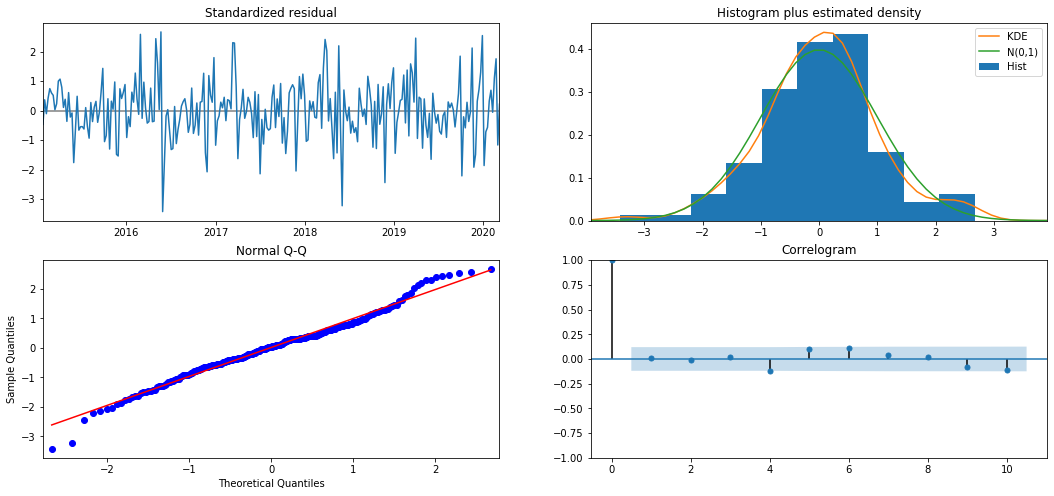

In [22]:
final_result.plot_diagnostics(figsize=(18, 8))
plt.show()

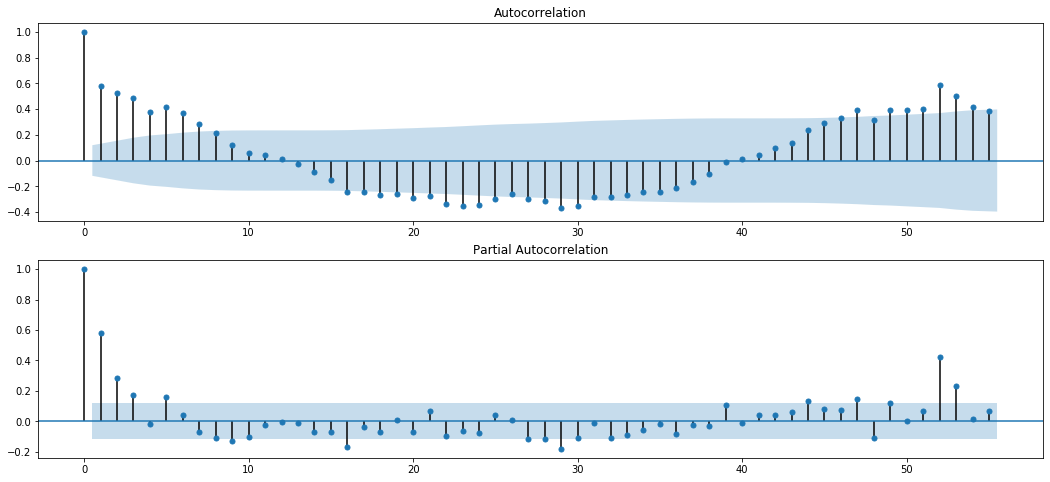

In [76]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(y_train, lags=55, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y_train, lags=55, ax=ax[1])
plt.show()

C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


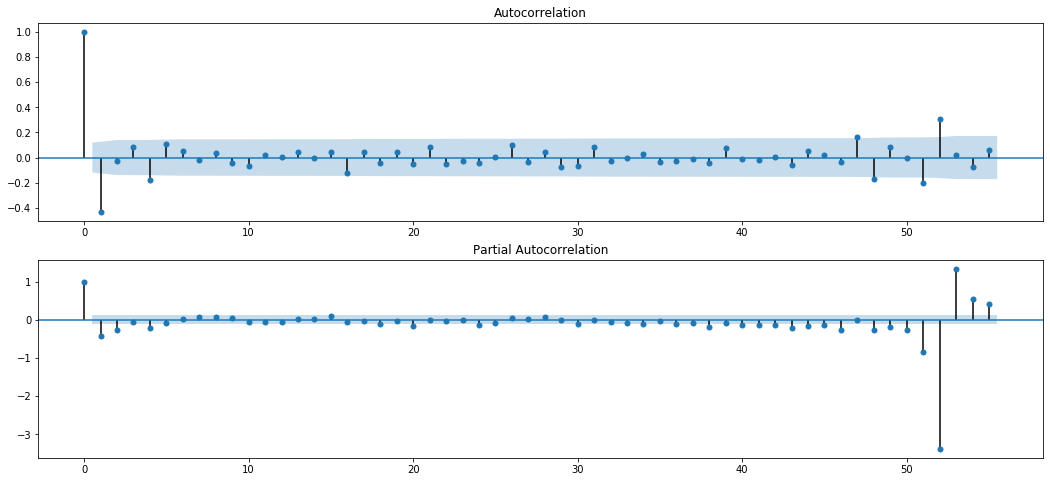

In [80]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(y_train.diff()['2015-01-11':], lags=55, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y_train.diff()['2015-01-11':], lags=55, ax=ax[1])
plt.show()

In [73]:
final_model_1= sm.tsa.statespace.SARIMAX(y_train,order=(0, 1, 1),seasonal_order=(0, 1, 1, 52),enforce_stationarity=False,
                                enforce_invertibility=False)
final_result_1= final_model_1.fit()

C:\Users\nisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


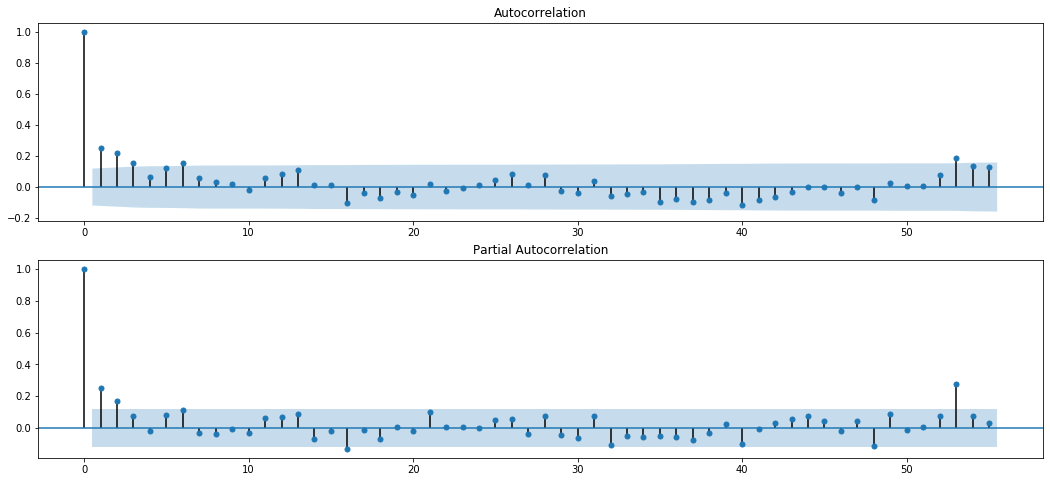

In [75]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(final_result_1.resid, lags=55, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(final_result_1.resid, lags=55, ax=ax[1])
plt.show()

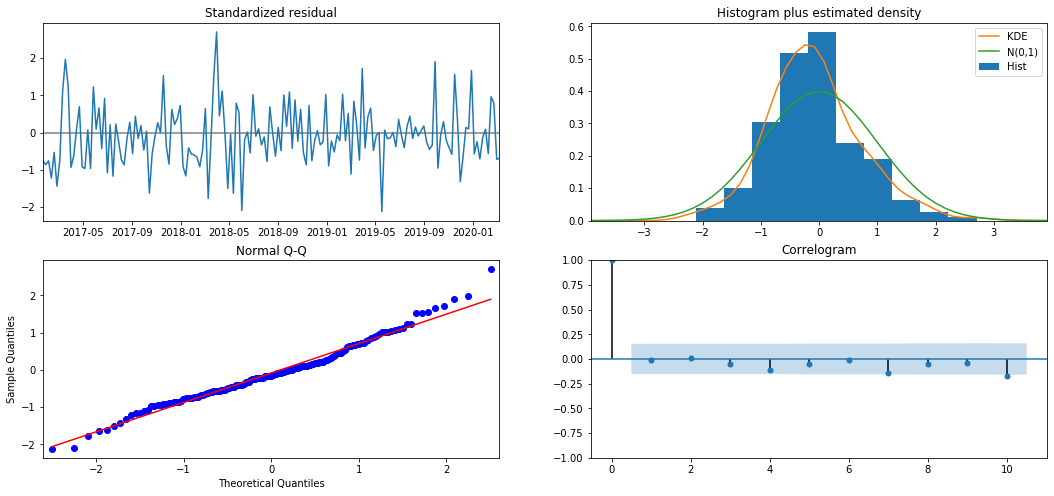

In [24]:
final_result_1.plot_diagnostics(figsize=(18, 8))
plt.show()

In [35]:
final_result_1.get_forecast(steps=10).predicted_mean

2020-03-15    2.245407e+06
2020-03-22    2.282397e+06
2020-03-29    2.563158e+06
2020-04-05    2.146917e+06
2020-04-12    2.329794e+06
2020-04-19    2.313320e+06
2020-04-26    2.018696e+06
2020-05-03    2.346857e+06
2020-05-10    2.073039e+06
2020-05-17    2.323047e+06
Freq: W-SUN, dtype: float64

In [212]:
y_train[y_train.index>'2020-01-01']

,Rev from a Sport Store retail
date,
2020-01-05,1.122936e+06
2020-01-12,1.259626e+06
2020-01-19,1.212462e+06
2020-01-26,1.443774e+06
2020-02-02,1.618276e+06
2020-02-09,1.454491e+06
2020-02-16,1.851955e+06
2020-02-23,2.236988e+06
2020-03-01,1.462602e+06


In [213]:
import numpy as np
pred = final_result.get_prediction(start=pd.to_datetime('2020-01-05'), dynamic=False)
y_forecasted = pred.predicted_mean.values
y_truth = y_train['2020-01-05':]['Rev from a Sport Store retail'].values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 51878700206.04
The Root Mean Squared Error is 227768.96


In [205]:
y_train['2015-01-11':]['Rev from a Sport Store retail'].values

array([1175469.77257899, 1406700.11790474, 1042556.54627645,
       1268013.12004847, 1155386.37850685, 1323853.84285581,
       1497652.87119023, 1551530.67201044, 1608355.30804362,
       1511075.52661012, 1586468.71469848, 1888235.54711529,
       2053061.6171125 , 2107751.92049585, 1980511.56538354,
       2092786.00754963, 1885197.45316432, 2175379.08425762,
       1971715.37608351, 1989865.95488862, 1389718.75104856,
       1528024.68822817, 1835367.73557648, 1502669.64302358,
       1450240.72327337, 1374403.10187343, 1269626.97502097,
       1435918.89598285, 1227506.57750023, 1012408.68860099,
       1303962.99002703, 1116712.43032901, 1235546.81377575,
       1321264.58523628, 1117042.00158449, 1181118.05340666,
       1411871.72290055, 1782362.12508155, 1115866.81936807,
       1039250.92739305, 1356991.83195079,  817397.33525958,
       1201391.69307484, 1151381.93587473, 1481549.49622518,
        760110.37282133,  531614.02041197, 1112086.3864293 ,
       1101512.90660826,

In [197]:
pred = final_result.get_prediction(start=pd.to_datetime('2015-01-11'), dynamic=False)
pred.predicted_mean.values

array([ 995682.23273371, 1014008.23657448, 1054040.00273886,
       1052869.26003547, 1074804.72383883, 1083021.04600534,
       1107578.07310657, 1147354.27204614, 1188569.58644248,
       1231377.61528396, 1259900.58735101, 1293203.77380798,
       1353885.41844567, 1425188.45242912, 1494797.83661834,
       1544332.34463388, 1600265.53767427, 1629323.99403343,
       1685012.98263855, 1714252.17288401, 1742360.55714188,
       1706396.43221414, 1688205.18972289, 1703213.57894588,
       1682761.06399518, 1659047.41146217, 1630017.86418502,
       1593263.25864413, 1577216.42624623, 1541551.1061349 ,
       1487586.25936612, 1468859.34719114, 1432945.45961301,
       1412813.65280107, 1403476.97104147, 1374264.74143924,
       1354566.56773332, 1360410.86656401, 1403443.80748018,
       1374115.10248739, 1339963.78546896, 1341700.40070113,
       1288229.04637819, 1279372.88805397, 1266319.65569115,
       1288269.99749109, 1234405.32728575, 1162730.74171968,
       1157565.74727541,

In [ ]:
master_subset[(master_subset.SNPSH_DT==master_subset.CLSD_DT) & (master_subset.SNPSH_DT==0) & (master_subset.SNPSH_DT<(master_subset.TT+1))].groupby(list(master_subset.columns[~master_subset.columns.isin(['SNPSH_DT','DEAL_SIZE'])].values))['DEAL_SIZE'].fillna(0).sum()

In [ ]:
master_subset[(master_subset.SNPSH_DT==master_subset.CLSD_DT) & (master_subset.SNPSH_DT==0) & (master_subset.SNPSH_DT<(master_subset.TT+1))].groupby('SNPSH_DT')['DEAL_SIZE'].apply(lambda x: sum(x.fillna(0)))